<a href="https://colab.research.google.com/github/pablojrios/fluence_maps/blob/master/util/tf2_validate_tfds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os

%cd -q '/content'
if os.path.exists('fluence_maps'):
  !rm -fr fluence_maps

## Install required dependencies
!pip install -q pydicom

GIT_USERNAME = "pablojrios"
GIT_TOKEN = "1d88a0b85d2b00a03796e4d8b7e5f7b249b12f9b"
!git clone -s https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/fluence_maps.git

     |████████████████████████████████| 35.3MB 1.2MB/s 
Cloning into 'fluence_maps'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 88 (delta 47), reused 27 (delta 10), pack-reused 0
Unpacking objects: 100% (88/88), done.


In [20]:
import os
from os import path
import tensorflow as tf

%cd '/content/fluence_maps'
from create_tfrecords.dataset_utils import _dataset_split_exists
from util.dataset import _tfrecord_dataset_type_from_folder, _parse_to_validate_image_function
import matplotlib.pyplot as plt

/content/fluence_maps


In [21]:
print('Tensorflow version = {}'.format(tf.__version__))
print('Executing eagerly = {}'.format(tf.executing_eagerly()))

Tensorflow version = 2.2.0-rc4
Executing eagerly = True


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#====================================================DEFINE YOUR ARGUMENTS=======================================================================
# base data directory
ARG_DATASET_DIR='/content/drive/My Drive/Healthcare/Radioterapia/data/ciolaplata'
# folder under ARG_DATASET_DIR path.
ARG_TFDATASET_FOLDER='tfds.2019.pablo'
# The number of shards to split the dataset into
ARG_NUM_SHARDS=4
ARG_FLUENCE_MAPS_TO_SHOW=10

<MapDataset shapes: {image/encoded: (), image/filename: (), image/format: (), image/gamma_index: (), image/height: (), image/width: ()}, types: {image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/gamma_index: tf.float32, image/height: tf.int64, image/width: tf.int64}>
Muestro los 10 primeros mapas en el TF dataset at /content/drive/My Drive/Healthcare/Radioterapia/data/ciolaplata/tfds.2019.pablo



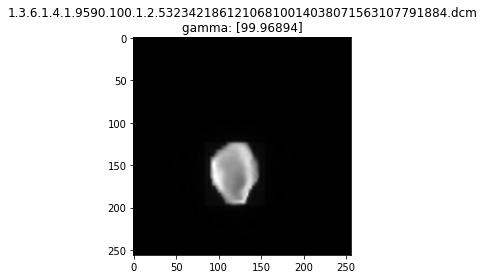

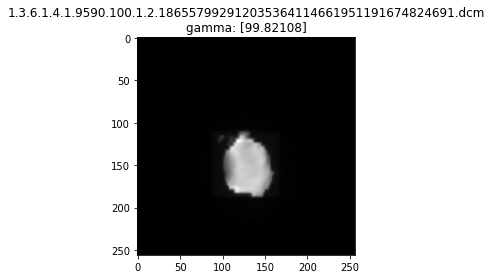

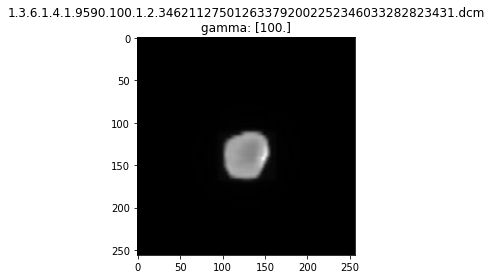

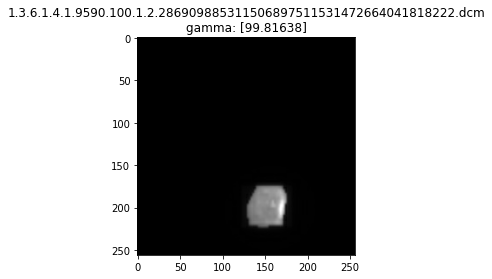

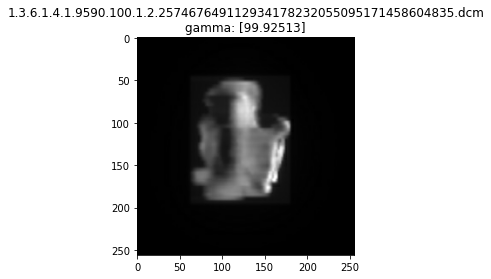

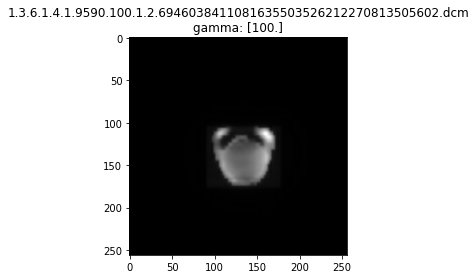

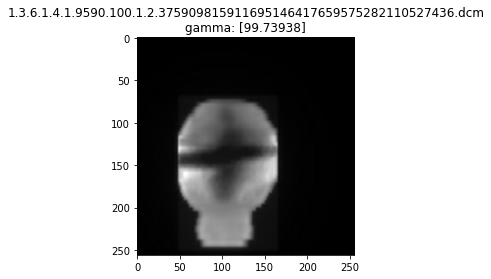

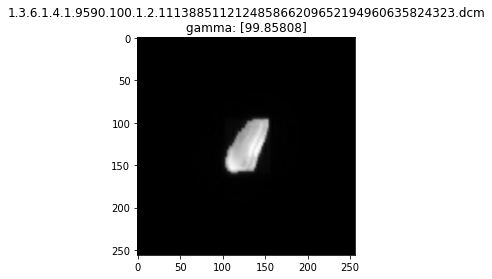

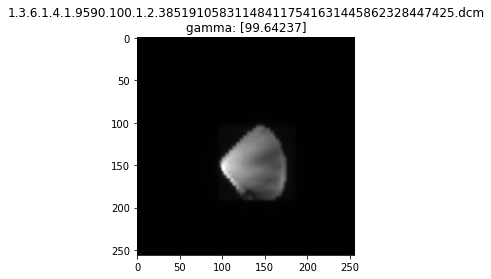

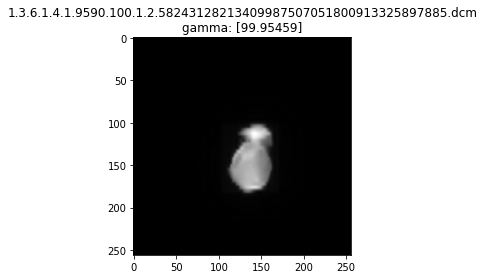

In [30]:
#==============================================================CHECKS==========================================================================
#Check if there is a dataset directory entered
if ARG_DATASET_DIR == "":
    raise ValueError('tfdataset_dir is empty. Please state a tfdataset_dir argument.')

#If the TFRecord files already exist in the directory, then exit without creating the files again
tfdataset_dir = path.join(ARG_DATASET_DIR, ARG_TFDATASET_FOLDER)
if not _dataset_split_exists(dataset_dir = tfdataset_dir, _NUM_SHARDS = ARG_NUM_SHARDS, split_name='train'):
    print('Dataset files doesn''t exist, exiting...')
    sys.exit()

# Retrieve data set from pattern.
raw_image_dataset = _tfrecord_dataset_type_from_folder(tfdataset_dir, 'train')

parsed_image_dataset = raw_image_dataset.map(_parse_to_validate_image_function)
print(parsed_image_dataset)

print("Muestro los {} primeros mapas en el TF dataset at {}\n".
      format(ARG_FLUENCE_MAPS_TO_SHOW, tfdataset_dir))
n = 0;
for image_features in parsed_image_dataset:
    image_raw = tf.image.decode_jpeg(image_features["image/encoded"], channels=3)
    plt.figure()
    plt.imshow(image_raw)
    gamma = tf.cast(
        tf.reshape(image_features["image/gamma_index"], [-1]),
        tf.float32)
    filename = image_features["image/filename"].numpy().decode('utf-8')
    plt.title("{}\ngamma: {}".format(filename[filename.rfind('/')+1:], gamma))
    n += 1
    if n == ARG_FLUENCE_MAPS_TO_SHOW: break

plt.show()
